# Association Rule Mining

In [1]:
import sys
import csv
import pandas as pd

DEBUGGING = False
DATA_DIR  = 'data/'
DATA_FILE = 'survey-data.csv'

MINIMUM_COVERAGE = 500
MINIMUM_CONFIDENCE = 0.5

class Clause:
    def __init__(self,column,value):
        self.column = column
        self.value = value
    def __str__(self):
        return ( '(' + self.column + '==' + self.value + ')' )
    def getColumn(self):
        return self.column
    def getValue(self):
        return self.value
    
class AssocRule:
    def __init__(self,ant_column,ant_value,con_column,con_value):
        self.antecedent = Clause(ant_column,ant_value)
        self.consequent = Clause(con_column,con_value)
        
    def __str__(self):
        return ( str( self.antecedent ) + '->' + str( self.consequent ))
    
    def getAntecedent( self ):
        return (self.antecedent)
    def getConsequent(self):
        return self.consequent

try:
    df = pd.read_csv(DATA_DIR+DATA_FILE,na_filter=False)
except IOError as iox:
    print('there was an I/O error trying to open the data file: ' + str( iox ))
    sys.exit()
    
N = len(df.columns)
M = len(df.values)

if DEBUGGING:
    print('INPUT FILE = ' + DATA_DIR + DATA_FILE)
    print('number of attributes = ' + str( N ))
    print('number of instances = ' + str( M ))
    for ( i, c, t ) in zip( range( N ), df.columns, df.dtypes ):
        print('{} - {} ({})'.format( i, c, t ))

coverage1 = {}
for c in df.columns:
    coverage1[c] = {}
for j in range (M):
    for c in df.columns:
        if(df[c].dtypes == 'object'):
            att_value = df[c].values[j]
            if(att_value in coverage1[c].keys()):
                coverage1[c][att_value] += 1
            else:
                coverage1[c][att_value] = 1
# print('one-item sets:')
# for c in df.columns:
#     if ( len( coverage1[c] ) > 0 ):
#         for k in coverage1[c].keys():
#             print(c, '==', k, ':', coverage1[c][k])
            
num_item1 = 0
for c in df.columns:
    for k in list(coverage1[c].keys()):
        if(coverage1[c][k] < MINIMUM_COVERAGE):
            del coverage1[c][k]
        else:
            num_item1 +=1 
# print('number of one-item sets above minimum coverage of ', MINIMUM_COVERAGE,'=', num_item1)
# print('one-item sets above minimum coverage of ', MINIMUM_COVERAGE,':')
# for c in df.columns:
#     if ( len( coverage1[c] ) > 0 ):
#         print(c, ':', end='')
#         for k in coverage1[c].keys():
#             print(k, '=', coverage1[c][k], end='')
#         print()

columns1 = []
for c in df.columns:
    if ( len( coverage1[c] ) > 0 ):
        columns1.append( c )

coverage2 = {}

for c1 in columns1:
    coverage2[c1] = {}
    
for j  in range (M):
    for i1 in range(len(columns1)):
        c1 = columns1[i1]
        att1_value = df[c1].values[j]
        if(att1_value not in coverage2[c1].keys()):
            coverage2[c1][att1_value] = {}
        
        for i2 in range(i1+1,len(columns1)):
            c2 = columns1[i2]
            if(c2 not in coverage2[c1][att1_value].keys()):
                coverage2[c1][att1_value][c2] = {}
           
            att2_value = df[c2].values[j]
            if(att2_value not in coverage2[c1][att1_value][c2].keys()):
                coverage2[c1][att1_value][c2][att2_value] = 1
            else:
                coverage2[c1][att1_value][c2][att2_value] += 1
                        
# print('two-item sets:')
# for c1 in columns1:
#     for k1 in coverage2[c1].keys():
#         for k2 in coverage2[c1][k1].keys():
#             for k3 in coverage2[c1][k1][k2].keys():
#                 print(c1, '==', k1, ' and ', k2, '==', k3, ':', coverage2[c1][k1][k2][k3])
    
# remove two-item sets that do not meet the minimum coverage
# num_item2 = 0
for c1 in columns1:
    for k1 in list( coverage2[c1].keys()):
        for c2 in list(coverage2[c1][k1].keys()):
            for k2 in list(coverage2[c1][k1][c2].keys()):
                if(coverage2[c1][k1][c2][k2] < MINIMUM_COVERAGE):
                    del coverage2[c1][k1][c2][k2]
# print('two-item sets after deleting:')
# for c1 in columns1:
#     for k1 in coverage2[c1].keys():
#         for k2 in coverage2[c1][k1].keys():
#             for k3 in coverage2[c1][k1][k2].keys():
#                 print(c1, '==', k1, ' and ', k2, '==', k3, ':', coverage2[c1][k1][k2][k3])

rules = []

for c1 in columns1:
    for v1 in coverage2[c1].keys():
        for c2 in coverage2[c1][v1].keys():
            for v2 in coverage2[c1][v1][c2].keys():
                rules.append(AssocRule(c1,v1,c2,v2))
                rules.append(AssocRule(c2,v2,c1,v1))
# for rule in rules:
#     print(str(rule))
confidence = [0.0 for i in range(len(rules))]
for i in range (len(rules)):
    ant = rules[i].getAntecedent()
    con = rules[i].getConsequent()
    rule_coverage = 0
    ant_coverage = 0
    for j in range(M):
        if(df[ant.getColumn()].values[j] == ant.getValue()):
            
            ant_coverage += 1
            if(df[con.getColumn()].values[j] == con.getValue()):
                rule_coverage += 1
    confidence[i] = float( rule_coverage ) / float( ant_coverage )
# print the rules and their confidence values
print('number of association rules = ', len( rules ))
print('association rules:')
for ( i, r ) in zip( range( len( rules )), rules ):
    print(r, ', confidence =', round(confidence[i],2) )

number of association rules =  6
association rules:
(internet==yes)->(maths==no) , confidence = 0.76
(maths==no)->(internet==yes) , confidence = 0.74
(internet==yes)->(politics==no) , confidence = 0.73
(politics==no)->(internet==yes) , confidence = 0.75
(maths==no)->(politics==no) , confidence = 0.76
(politics==no)->(maths==no) , confidence = 0.8


[('(internet==yes)', '(maths==no)'), ('(maths==no)', '(internet==yes)'), ('(internet==yes)', '(politics==no)'), ('(politics==no)', '(internet==yes)'), ('(maths==no)', '(politics==no)'), ('(politics==no)', '(maths==no)')]


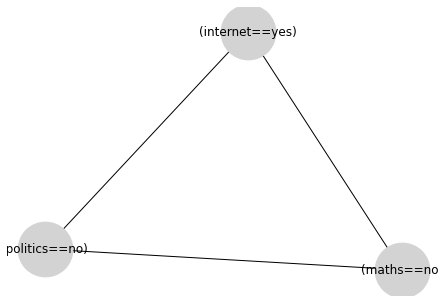

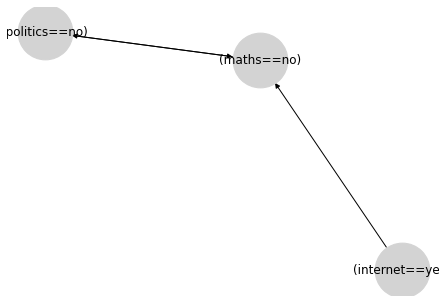

In [13]:
import networkx as nx
import matplotlib.pyplot as plt


list_of_rules = []
for r in rules:
    list_of_rules.append(( str( r.antecedent ), str( r.consequent ) ))
print(list_of_rules)
plt.figure()
g = nx.Graph()
g.add_edges_from(list_of_rules)


nx.draw( g, node_size=3000, with_labels=True, node_color='lightgrey' )
plt.show()

MINIMUM_CONFIDENCE = 0.75
list_of_rules = []
for (i,r) in zip(range(len(rules)),rules):
    if ( confidence[i] > MINIMUM_CONFIDENCE ):
        list_of_rules.append(( str( r.antecedent ), str( r.consequent ) ))
plt.figure()
g = nx.DiGraph()
g.add_edges_from( list_of_rules )
nx.draw( g, node_size=3000, with_labels=True, node_color='lightgrey' )

plt.show()

# Time Series Data Mining

In [32]:
#--
# tsdm-data0.py
# time series data mining data exploration using downloaded data
# @author: letsios, sklar
# @created: 28 Jan 2021
#
#--

import sys
import csv
import pandas as pd
import numpy as np

DEBUGGING = True
DATA_DIR  = 'data/'
DATA_FILE = 'traffic-data.csv'


#--
# MAIN
#--

#-get data from a file
try:
    df = pd.read_csv( DATA_DIR + DATA_FILE, na_filter=False )
except IOError as iox:
    print('there was an I/O error trying to open the data file: ' + str( iox ))
    sys.exit()
#-get and size of raw data set
N = len( df.columns )
M = len( df.values )

#-print columns
if DEBUGGING:
    print('INPUT FILE = ' + DATA_DIR + DATA_FILE)
    print('number of attributes = ' + str( N ))
    print('number of instances = ' + str( M ))
    for ( i, c, t ) in zip( range( N ), df.columns, df.dtypes ):
        print('{} - {} ({})'.format( i, c, t ))


INPUT FILE = data/traffic-data.csv
number of attributes = 10
number of instances = 5426
0 - Unnamed: 0 (int64)
1 - DATE (object)
2 - CAMERA.ID (object)
3 - ADDRESS (object)
4 - VIOLATIONS (int64)
5 - LATITUDE (float64)
6 - LONGITUDE (float64)
7 - LOCATION (object)
8 - date (object)
9 - count (int64)


total number of violations= 357420
earliest time= 2014-07-01 1404172800.0
latest time= 2016-12-31 1483142400.0


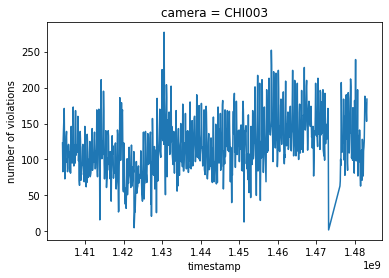

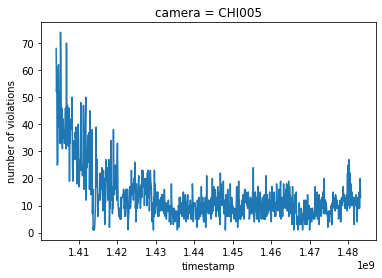

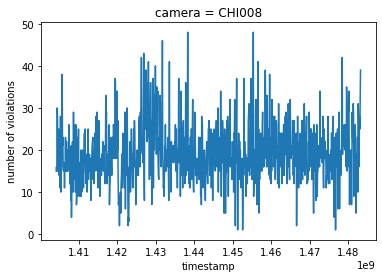

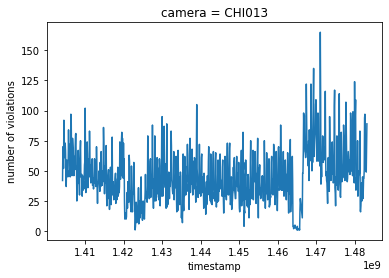

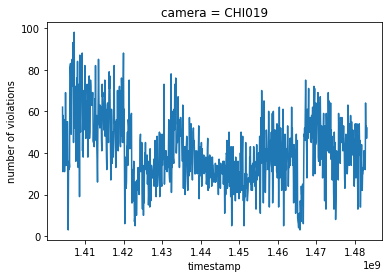

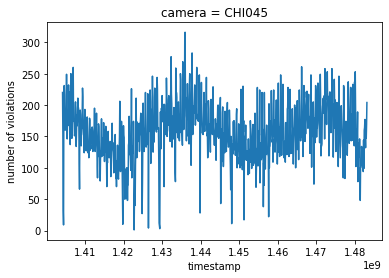

In [61]:
import time
# list_of_camera = []
# for camera in df["CAMERA.ID"]:
#     list_of_camera.append(camera)
# list_of_camera = set(list_of_camera)
# list_of_camera

PLOTTING = True

#-get a unique list of cameras
cameras = sorted( set( df['CAMERA.ID'].values ))
# print('cameras = ', cameras)


for c in cameras:
    num = len(df.loc[df['CAMERA.ID'] == c])
#     print("camera: ",c ,"incidents= ",num)

total_violations = 0
for c in cameras:
    d = df.loc[df['CAMERA.ID'] == c]
    v = list(d["VIOLATIONS"])
#     print('camera: ', c, ' incidents=', len( v ), ' violations=', np.sum( v ))
    total_violations += np.sum( v )
print('total number of violations=', total_violations)

d= df['date'].values
min_date = np.min(d)
max_date = np.max(d)
( yyyy, mm, dd ) = min_date.split( '-' )
tm = time.struct_time(( int( yyyy ), int( mm ), int( dd ), 0, 0, 0, 0, 0, 0 ))
min_ts = time.mktime( tm )
( yyyy, mm, dd ) = max_date.split( '-' )
tm = time.struct_time(( int( yyyy ), int( mm ), int( dd ), 0, 0, 0, 0, 0, 0 ))
max_ts = time.mktime( tm )
print('earliest time=', min_date, min_ts)
print('latest time=', max_date, max_ts)

if PLOTTING:
    for c in cameras:
        ts =[]
        viols = []
        d = pd.DataFrame(df.loc[df['CAMERA.ID']==c])
        d.sort_values( by=['date'] )
        for j in range(len(d)):
            (yyyy,mm,dd) = d['date'].values[j].split('-')
            tm = time.struct_time(( int( yyyy ), int( mm ), int( dd ), 0, 0, 0, 0, 0, 0 ))
            ts.append(time.mktime(tm))
            viols.append(float(d['VIOLATIONS'].values[j]))
        plt.figure()
        plt.plot( ts, viols )
        plt.xlabel( 'timestamp' )
        plt.ylabel( 'number of violations' )
        plt.title("camera = "+c)
       
        plt.show()
        plt.close()

In [1]:
from pandas.testing import assert_frame_equal
plt.figure()
for c in cameras:
    ts =[]
    viols = []
    d = df.loc[df["CAMERA.ID"] == c]
    d = d.sort_values(by=['date'])
    for j in range(len(d)):
        (yyyy,mm,dd) = d['date'].values[j].split('-')
        tm = time.struct_time((int( yyyy ), int( mm ), int( dd ), 0, 0, 0, 0, 0, 0 ))
        ts.append(time.mktime(tm))
        viols.append(float(d['VIOLATIONS'].values[j]))
    plt.plot(ts,viols,label = c, alpha = 0.5)
plt.xlabel( 'timestamp' )
plt.ylabel( 'number of violations' )
plt.legend()

plt.show()
plt.close()


NameError: name 'plt' is not defined

# Survival Data Mining

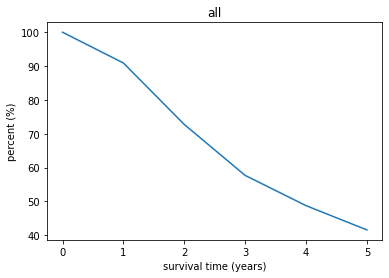

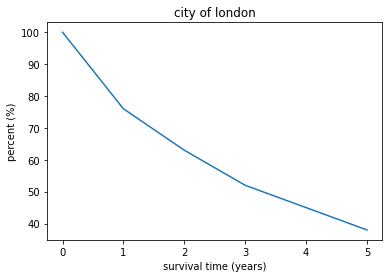

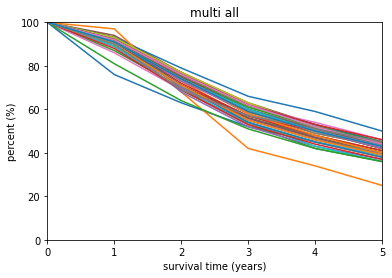

In which region is a business most likely to fail after 5 years?
Lambeth with a rate of  25 %
In which region is a business most likely to survive after 5 years?
Kingston upon Thames with a rate of  50 %


In [23]:
import sys
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

DEBUGGING = False
DATA_DIR  = 'data/'
DATA_FILE = 'business-survival.csv'

try:
    df = pd.read_csv(DATA_DIR+DATA_FILE, na_filter=False )
except IOError as iox:
    sys.exit()
    
M = len(df.values)
N = len(df.columns)

#-print columns
if DEBUGGING:
    print('INPUT FILE = ' + DATA_DIR + DATA_FILE)
    print('number of attributes = %d' % ( N ))
    print('number of instances = %d' + str( M ))
    for ( i, c, t ) in zip( range( N ), df.columns, df.dtypes ):
        print('{} - {} ({})'.format( i, c, t ))
        
sdata = [[0 for j in range(M)] for i in range(5)]
for j in range(M):
    sdata[0][j] = df['1 Year Survival Percent'].values[j]
    sdata[1][j] = df['2 Year Survival Percent'].values[j]
    sdata[2][j] = df['3 Year Survival Percent'].values[j]
    sdata[3][j] = df['4 Year Survival Percent'].values[j]
    sdata[4][j] = df['5 Year Survival Percent'].values[j]
    
pct = [0 for i in range(6)]
pct[0] = 100
for i in range( 5 ):
    pct[i+1] = np.mean( sdata[i][:] )

plt.figure()
plt.plot(  pct )
plt.title("all")
plt.ylabel( 'percent (%)' )
plt.xlabel( 'survival time (years)' )
plt.show()


for i in range(5):
    pct[i+1] = sdata[i][0]
plt.figure()
plt.plot(  pct )

plt.title('city of london')
plt.ylabel( 'percent (%)' )
plt.xlabel( 'survival time (years)' )
plt.show()

# plot the average survival over all regions
plt.figure()
for j in range( M ):
    pct = [0 for i in range( 6 )]
    pct[0] = 100
    for i in range( 5 ):
        pct[i+1] = sdata[i][j]
    plt.plot( np.linspace( 0, 5, 6 ), pct )
plt.xlim(( 0, 5 ))
plt.ylim(( 0, 100 ))
plt.title("multi all")
plt.ylabel( 'percent (%)' )
plt.xlabel( 'survival time (years)' )

plt.show()
plt.close()

i = np.argmin( df['5 Year Survival Percent'].values )
print('In which region is a business most likely to fail after 5 years?')
print(df['Area'].values[i], end=' ')
print('with a rate of ', end=' ')
print(df['5 Year Survival Percent'].values[i], end=' ')
print('%')

# In which region is a business most likely to survive after 5 years?
i = np.argmax( df['5 Year Survival Percent'].values )
print('In which region is a business most likely to survive after 5 years?')
print(df['Area'].values[i], end=' ')
print('with a rate of ', end=' ')
print(df['5 Year Survival Percent'].values[i], end=' ')
print('%')